# Problem description

Hiring staff can be a very complicated and late task, because depending on the position, candidates are needed who have to meet certain capabilities and cover other skills. Finding the ideal candidate can take a long time, some studies show that this task can last up to 52 days.

Listed below are some points to take into consideration when hiring new employees.

* Hiring and retaining employees are extremely complex tasks within organizations that require capital, time and skills.
* The heads of the Human Resources department dedicate approximately 40% of their working hours to tasks that are related to the hiring and dismissal of employees, tasks that generally do not bring income to the organization.
* Companies can spend between 15% to 20% of the employee's salary to hire a new candidate.
* Depending on the line of business of the organization, in certain jobs, the company has to invest in equipment so that the new employee can work, giving as an example, personal protection equipment, and when an employee decides to leave the position, there is the possibility that this does not return the equipment, so it translates directly into a non-returnable investment for the company.

A database has been generated with information regarding the resignations that have been presented in a company. In order to attack the problem of staff attrition, an analysis is carried out with the aim of predicting which employees are likely to resign their position.

A signal on time can be important for the company to generate solutions to retain the employee and avoid hiring a new one.

Within the set of data provided by the department is information related to the following items:
* Labor participation
* Education
* Work satisfaction
* Performance Rating
* Satisfaction in relationships
* Work-Life Balance

The data to be used for the analysis is Open Database available at: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).

# Libraries and analysis of the data set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
# Importing the data
employee_df = pd.read_csv('./Human_Resources.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
# Columns name
columns = employee_df.columns

Getting more information to some columns that are difficult to understand. (This information is provided by the Dataset creator).

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

We are at face on a dataset with 1470 samples and 35 variables or characteristics.

In [5]:
employee_df.shape

(1470, 35)

Understanding the dataset. Column name, null values and data type for each column.

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Some statistical information for numerical columns

In [7]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Before to apply a Machine Learning model it is important to convert the categorical variables into numerical. Will be taken the most important Object data type columns and will be converted into dummies variables.

In [8]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

Checking if the changes have been applied correctly.

In [9]:
employee_df[['Attrition', 'Over18', 'OverTime']].head()

,Attrition,Over18,OverTime
0,1,1,1
1,0,1,0
2,1,1,1
3,0,1,1
4,0,1,0


# Data visualization

### Null values

Let's check if there is null data in the dataset.

Will be used the seaborn tool to print a binary heatmap.

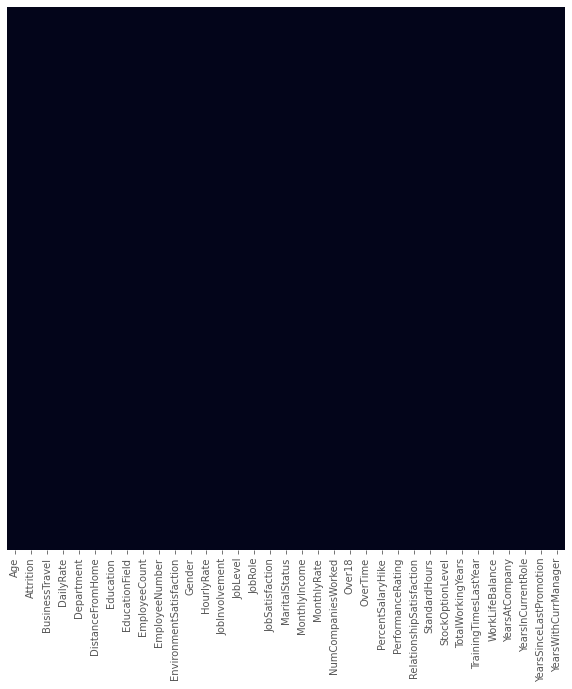

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False)
plt.show()

As the graph shows, there is not any null value in the dataset.

### Variable distribution

One excellent way to understand a variable is with its histogram. In the next code line will be printed. 

<Figure size 432x288 with 0 Axes>

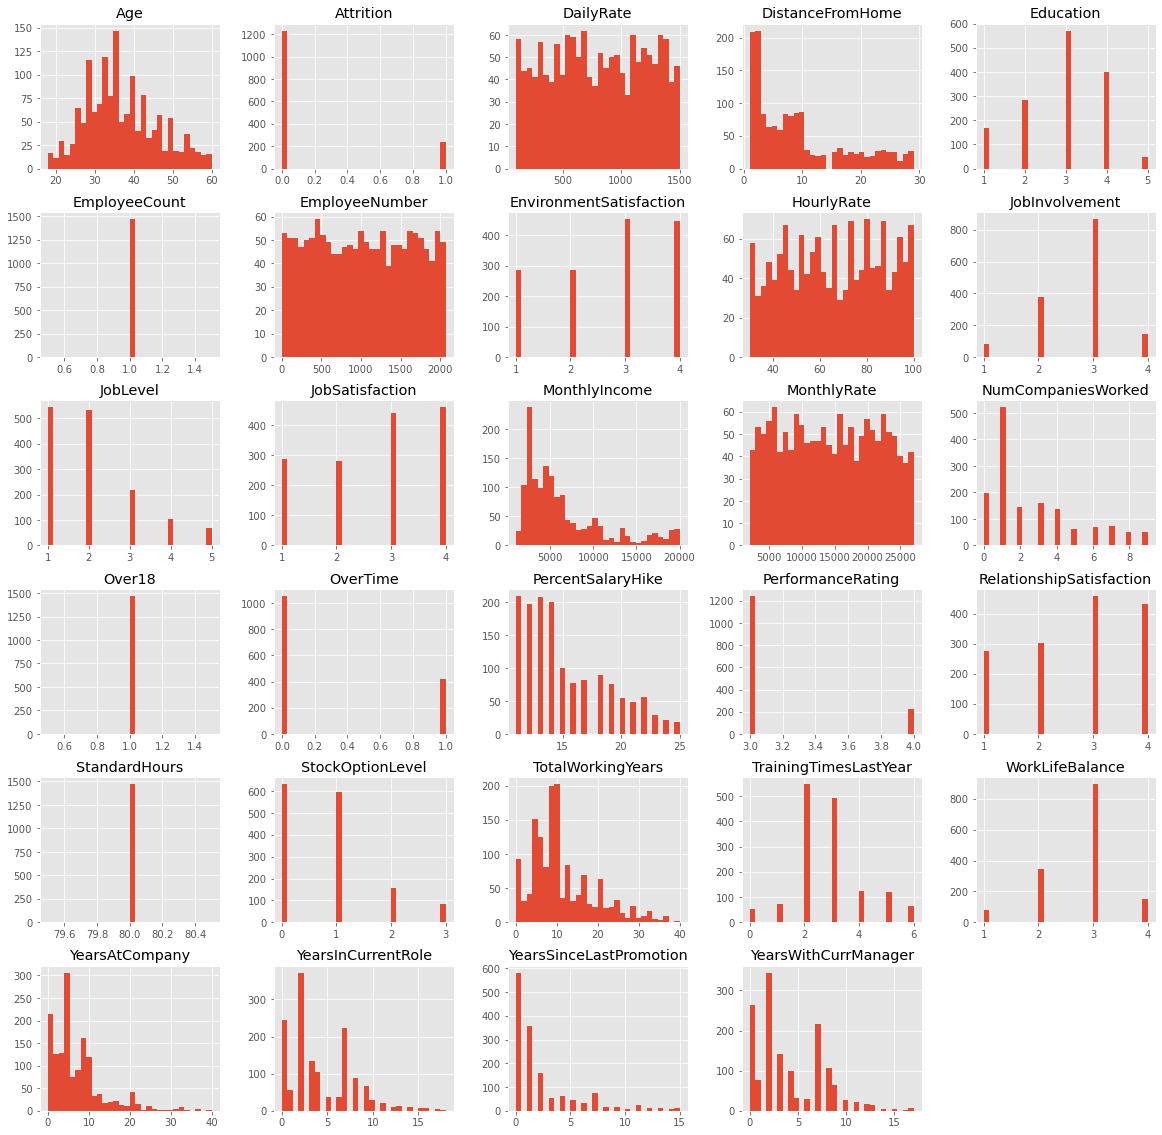

In [11]:
plt.figure()
employee_df.hist(bins = 30, figsize=(20,20))
plt.show()

Some important conclusion can be made with the before results. For example, aprox of 80% of the employees are considering not leave the company, the other 20% has left the company.

Now, the goal of the analysis is understand the characteristics of those 20%.

### Employees who leave the company vs those who stay.

Deleting variables that do not contribute much to the problem being analyzed.

In [12]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'],
                 axis=1, inplace=True)

Dividing the dataset into the employees that left the company and the other hand with the employees that stay at the company.

In [13]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [14]:
total_employees = employee_df.shape[0]
total_left = left_df.shape[0]
total_stayed = stayed_df.shape[0]

per_left = round((total_left / total_employees) * 100, 2)
per_estayed = round((total_stayed / total_employees) * 100, 2)

print('Total employees: {}, Total Left: {}, Total Stayed: {}'.format(total_employees,
                                                                               total_left,
                                                                               total_stayed))
print('Persentage Left: {}%, Persentage Stayed: {}%'.format(per_left, per_estayed))

Total employees: 1470, Total Left: 237, Total Stayed: 1233
Persentage Left: 16.12%, Persentage Stayed: 83.88%


In [15]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Making an analysis of both datasets to make some conclusion of the data:

* The mean and standard error of the employees who stayed and left are compared.
* 'age': The average age of the employees who stayed is older compared to those who left.
* 'DailyRate': The daily rate of the employees who stayed is higher.
* 'DistanceFromHome': Employees who remain live closer to work.
* 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stay are generally more satisfied with their jobs.
* 'StockOptionLevel': Employees who stay have a higher level of stock options.
* 'MonthlyIncome': Employees who stay have a higher monthly Income.

### Correlation Matrix

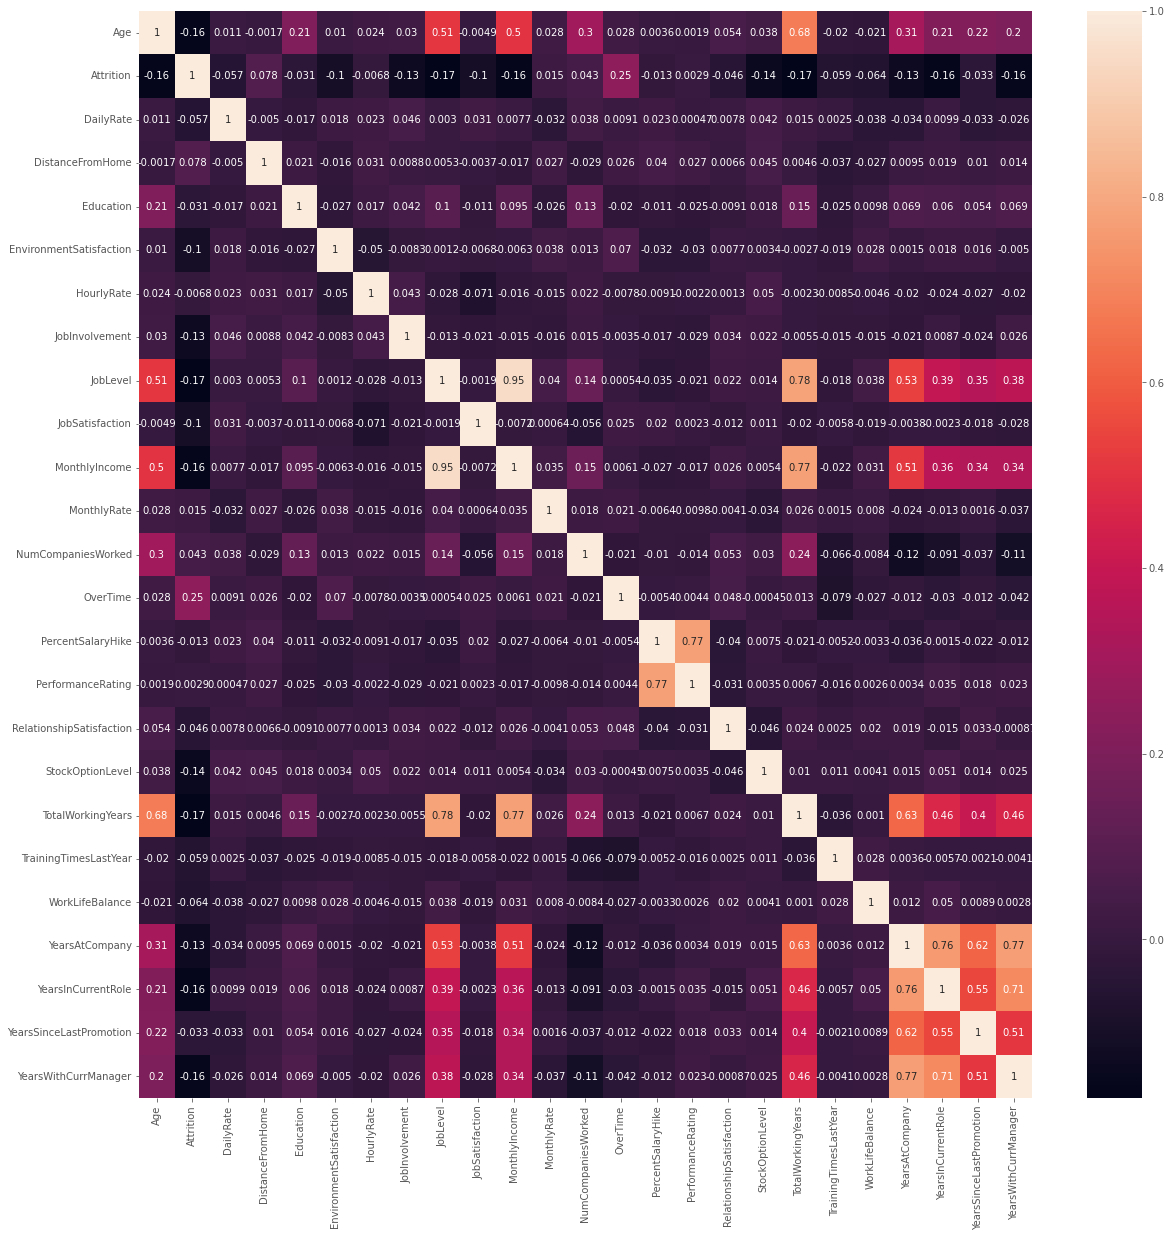

In [17]:
correlations = employee_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)
plt.show()

Conclusions:

* Job level is highly correlated with the total number of working hours.
* Monthly income is highly correlated with Job level.
* Monthly income is highly correlated with the total number of working hours.
* Age is highly correlated with monthly income.

### Distribution

#### Age vs Attrition

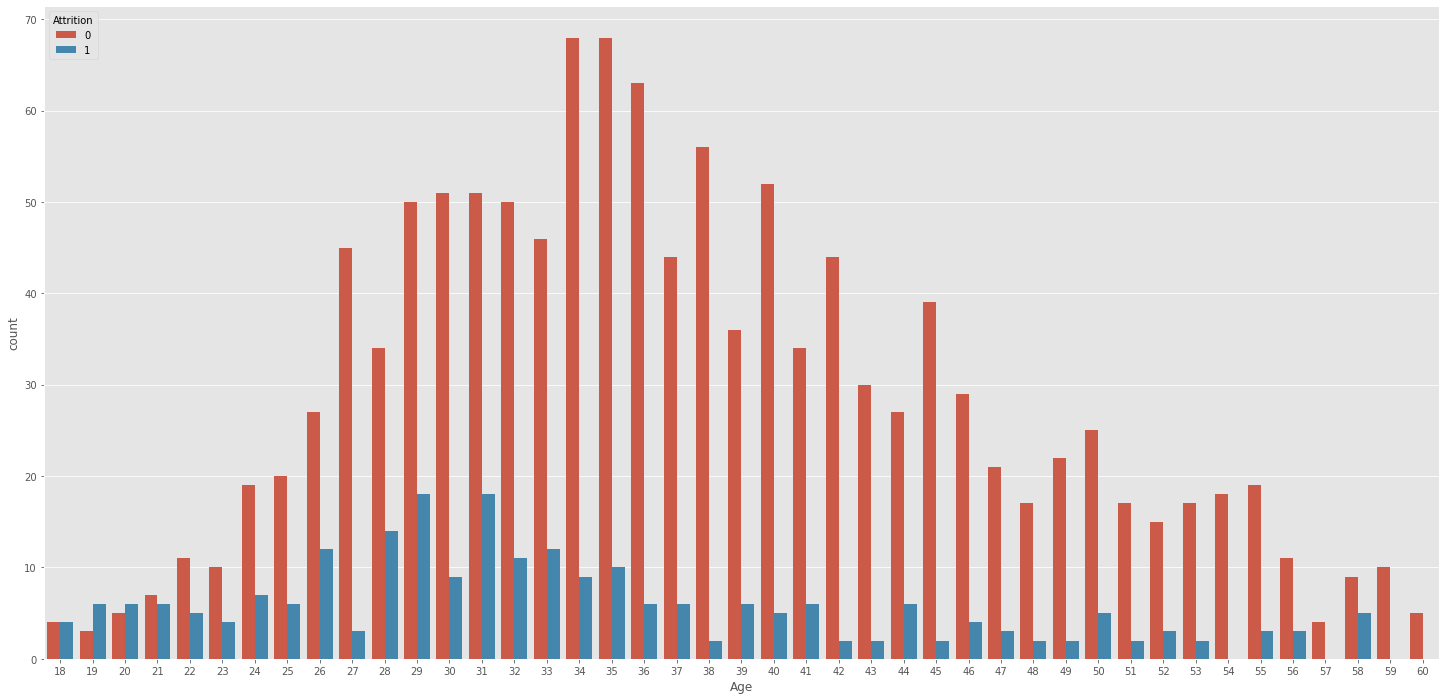

In [18]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)
plt.show()

The most employees who leave the company are between the 18 and 37 years old. Once one employee has more than that age, the probability to leave the company decrease.

One factor as the age might be important to determinate if one employee will or not leave the company.

#### Job Role, Marital Status, Job Involvement and Job Level.

More variables could be analyzed to understand the data distribution.

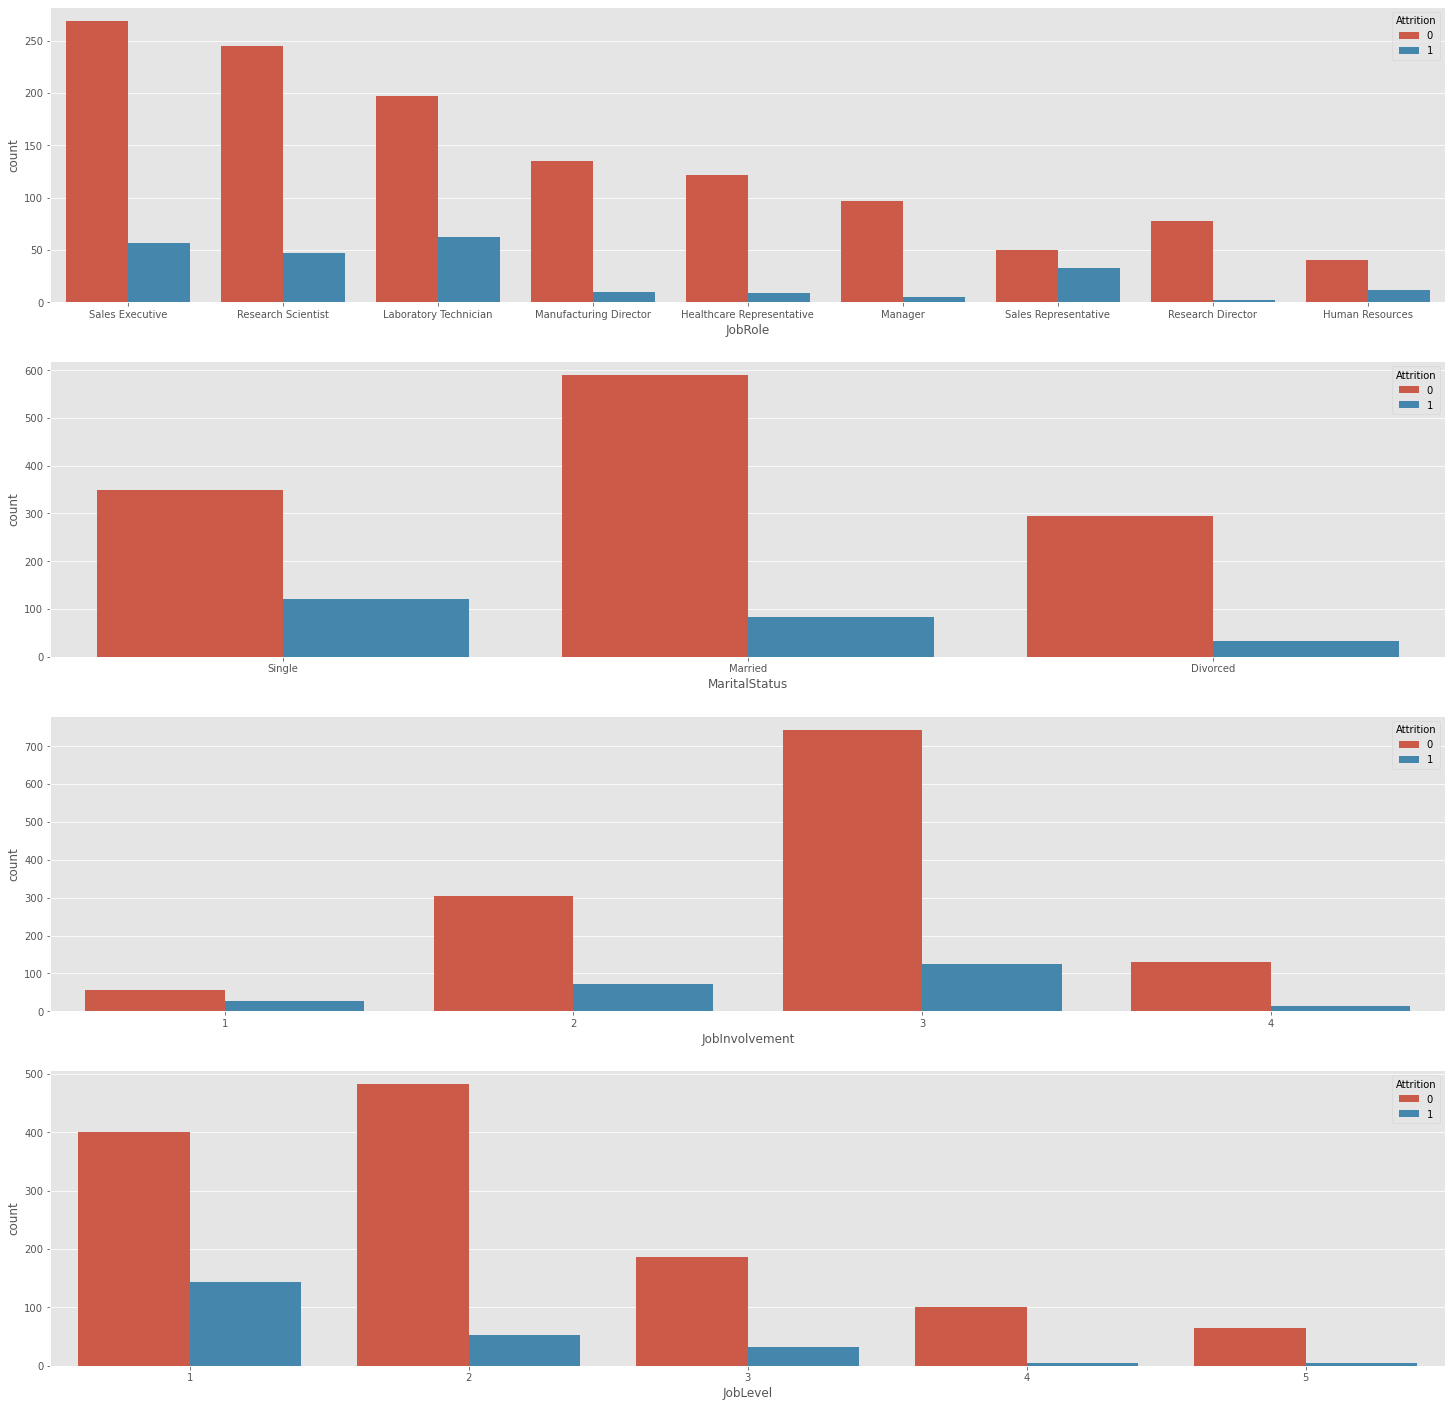

In [19]:
plt.figure(figsize=(25,25))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.show()

Conclusions:
* In sales department exists a high percentage of employees that leave the company, aprox the 40%
* The Single employees are more likely to leave the company than the others.
* As much as the job involvement is lower is more likely that one employee leaves.
* One employee with more Jove level is less likely to leaves the company.

### Density Distribution

#### Distance from Home

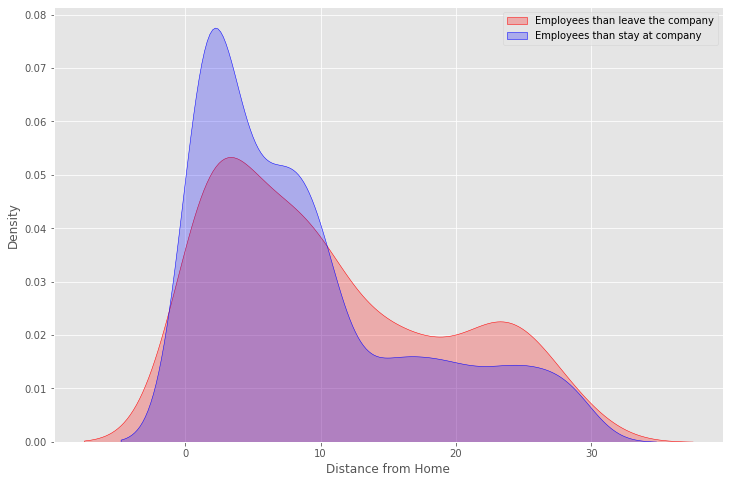

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees than leave the company',
            shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees than stay at company',
            shade=True, color='b')
plt.xlabel('Distance from Home')
plt.legend()
plt.show()

In one hand, if the distance is short, the probability of stay is higher, in the other hand, if the distance increase, more than 10 miles, the probability to leave is higher.

#### Years with current manager

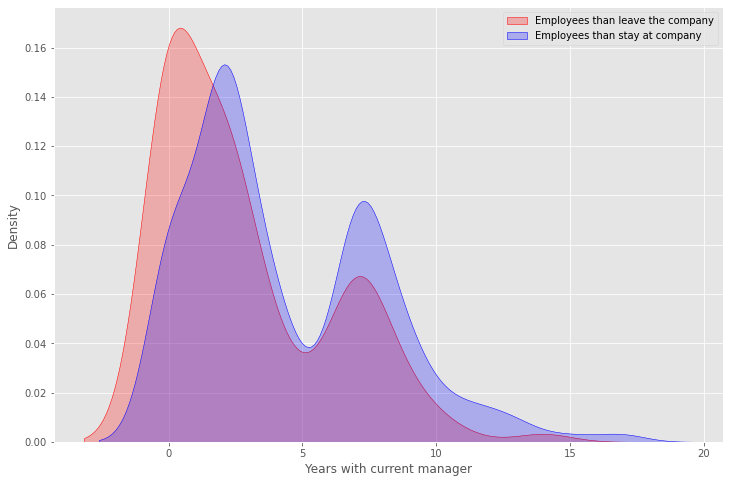

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees than leave the company',
            shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees than stay at company',
            shade=True, color='b')
plt.xlabel('Years with current manager')
plt.legend()
plt.show()

Once an employee stays approx 1.5 years with the same manager, is more likely to stay at company.

#### Total working years

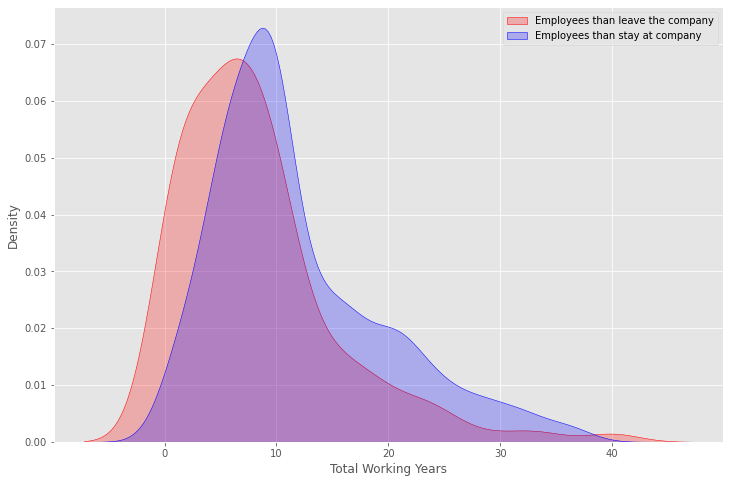

In [22]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees than leave the company',
            shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees than stay at company',
            shade=True, color='b')
plt.xlabel('Total Working Years')
plt.legend()
plt.show()

As the time staying at the company is higher, the probability of stay is also high.

### Box Plots

#### Gender vs Monthly Income

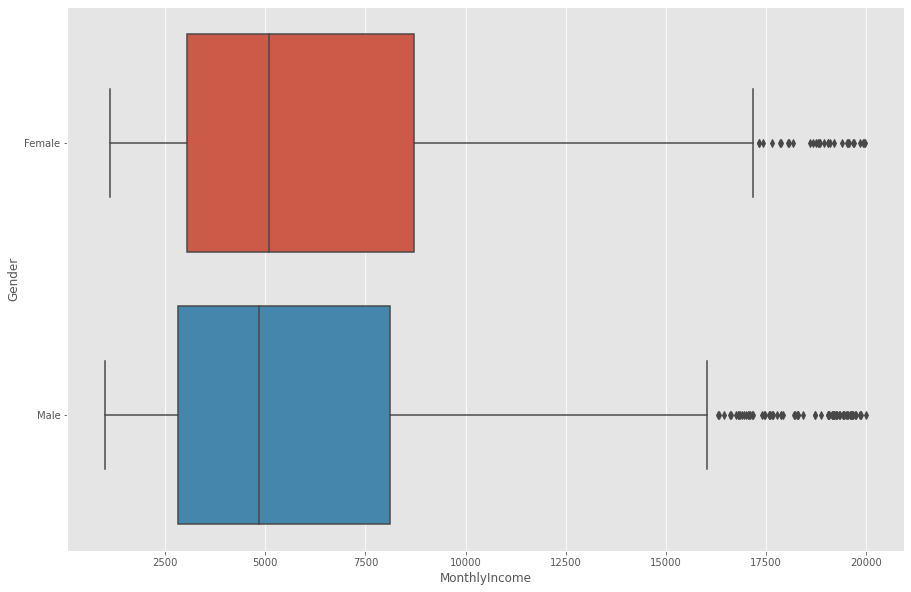

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)
plt.show()

There is not discrimination due the gender of the employee, in the plot can be ilustrate that the mean salary for gender is almos the same, in fact, the mean salary of the female are a bit higher as the male.

#### Monthly Income vs Job Role

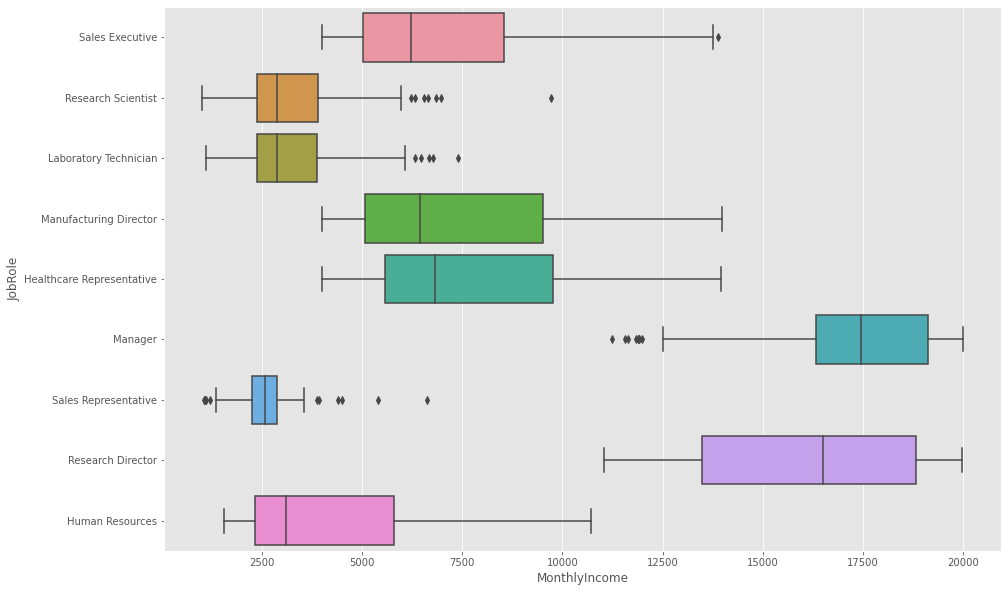

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)
plt.show()

In the previous plot are more interesting information:
* The employees with highest salary are those are managers or research directors.
* The sales representative, research scientist and laboratory technician are the lowest payed.

# Data Cleaning, Training and Testing datasets 

### Working with categorical variables

In [25]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
x_cat = employee_df[cat_cols]

In [26]:
x_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [29]:
x_cat.shape

(1470, 26)

In [30]:
x_cat = pd.DataFrame(x_cat)
x_cat.head() 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Working with Numerical variables

In [33]:
num_cols = [col for col in columns if col not in cat_cols if col != 'Attrition']
x_num = employee_df[num_cols]

In [34]:
x_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


### Joining all variables

In [35]:
x_all = pd.concat([x_cat, x_num], axis=1)
x_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


### Min-Max Scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_all)
x_scaled

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

### Predicted variable

In [38]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Train and evaluate the Model

## Logistic Regression

Dividing the data between training set and testing set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

In [41]:
x_train.shape

(1102, 50)

In [42]:
x_test.shape

(368, 50)

Training the model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Evaluating the model

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print('Accuracy: {}'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 88.04347826086956


The model has an 88.04% of accuracy, that means that the model can predict correctly on the 88.04% if one employee has left the company or has stayed.

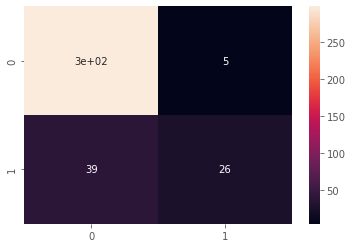

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       303
           1       0.84      0.40      0.54        65

    accuracy                           0.88       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.88      0.88      0.86       368



## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [51]:
print('Accuracy: {}'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 83.96739130434783


The random forest algorithm is a good choice, we have an accuracy of 83.9%, a little lower than the logistic regression.

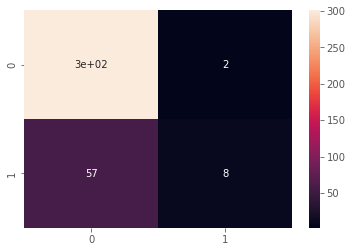

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       303
           1       0.80      0.12      0.21        65

    accuracy                           0.84       368
   macro avg       0.82      0.56      0.56       368
weighted avg       0.83      0.84      0.79       368



## Deep Learning

In [54]:
import tensorflow as tf 

Training the model

In [55]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=64, verbose=2)

2022-03-19 08:07:02.189144: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-19 08:07:02.189603: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-19 08:07:02.192517: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-19 08:07:02.361876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-19 08:07:02.362716: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400005000 Hz


Epoch 1/30
18/18 - 2s - loss: 0.4278 - accuracy: 0.8430
Epoch 2/30
18/18 - 0s - loss: 0.3401 - accuracy: 0.8548
Epoch 3/30
18/18 - 0s - loss: 0.3249 - accuracy: 0.8739
Epoch 4/30
18/18 - 0s - loss: 0.3070 - accuracy: 0.8757
Epoch 5/30
18/18 - 0s - loss: 0.2695 - accuracy: 0.9020
Epoch 6/30
18/18 - 0s - loss: 0.2367 - accuracy: 0.9056
Epoch 7/30
18/18 - 0s - loss: 0.2124 - accuracy: 0.9201
Epoch 8/30
18/18 - 0s - loss: 0.1872 - accuracy: 0.9374
Epoch 9/30
18/18 - 0s - loss: 0.1684 - accuracy: 0.9392
Epoch 10/30
18/18 - 0s - loss: 0.1350 - accuracy: 0.9555
Epoch 11/30
18/18 - 0s - loss: 0.1148 - accuracy: 0.9574
Epoch 12/30
18/18 - 0s - loss: 0.0979 - accuracy: 0.9646
Epoch 13/30
18/18 - 0s - loss: 0.0676 - accuracy: 0.9791
Epoch 14/30
18/18 - 0s - loss: 0.0486 - accuracy: 0.9882
Epoch 15/30
18/18 - 0s - loss: 0.0281 - accuracy: 0.9918
Epoch 16/30
18/18 - 0s - loss: 0.0165 - accuracy: 0.9955
Epoch 17/30
18/18 - 0s - loss: 0.0100 - accuracy: 0.9973
Epoch 18/30
18/18 - 0s - loss: 0.0079 - 

Undestanding the loss and the accuracy on each epoch of the training.

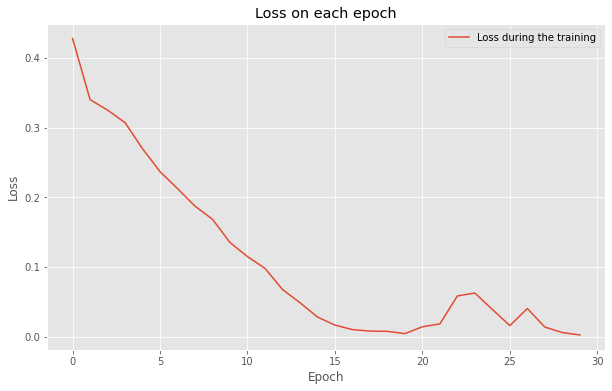

In [57]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.title('Loss on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss during the training'])
plt.show()

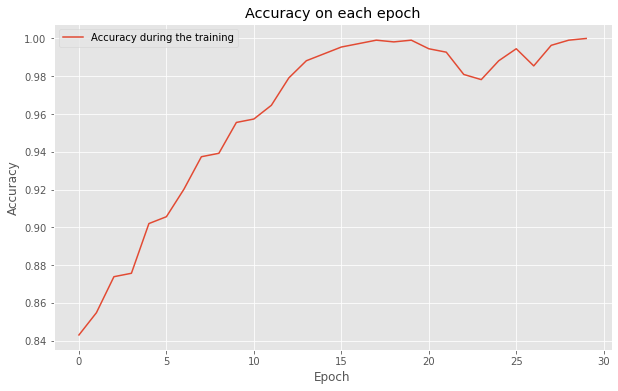

In [58]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'])
plt.title('Accuracy on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy during the training'])
plt.show()

The Loss is 0 almost aprox on the 25 epochs and so on, at the same time, the accuracy is almost 100%. It is not exactly a good model, maybe, the model is overfitting the data, to verify this, it is necessary evaluate the model.

Evaluating the model

In [59]:
y_pred = model.predict(x_test)

Due to the results that it is getting from the neural net is a probability, it is important to transform those probabilities into 0 or 1, in order to evaluate the model correctly.

In [60]:
y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

In [61]:
print('Accuracy: {}'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 84.78260869565217


As we can see, we have and 84.78% of accuracy when the predictions are made with new data.

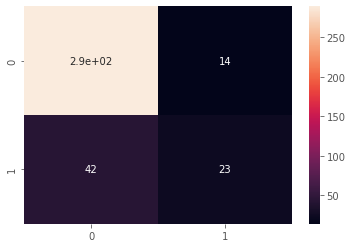

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       303
           1       0.62      0.35      0.45        65

    accuracy                           0.85       368
   macro avg       0.75      0.65      0.68       368
weighted avg       0.83      0.85      0.83       368



**Conclusions**

* The best model is the logistic regression model, with 88.04% accuracy when evaluating the test data.
* The neural network, upon reaching a certain number of epochs, learns the data, when evaluated we have a low precision which means that we have an algorithm with overfitting.
* The model to be implemented will be the logistic regression, this to solve the problem. In the future, the neural network can be improved to avoid overfitting by applying regularizations.